In [4]:
import math
import matplotlib.pyplot as plt

In [13]:
# Model input

# Form: -(p(x)y'(x))' + q(x)y(x) = f(x)

def p(x): return 1
def q(x): return 0
def f(x): return math.sin(x)

x0 = 0
y0 = 0
xn = 2 * math.pi
yn = 0

In [17]:
# Method input

# Number of steps
n = 20
# Step size calculation
h = (xn - x0) / (n + 1)


# h = math.pi/8
# n = (xn - x0) / n - 1

In [18]:
# Method implementation

def x(i): return x0 + i*h

# Fill matrices

# Matrix three diagonals
A = []
B = []
C = []

# y values
Y = []

# Equation's right side
F = []

# A, B, C diagonals
A.append(0)
for i in range(1, n):
    A.append(-p(x(i+1/2)))
    B.append(p(x(i-1/2)) + p(x(i+1/2)) + h**2 * q(x(i)))
    C.append(-p(x(i+1/2)))
B.append(p(x(n-1/2)) + p(x(n+1/2)) + h**2 * q(x(n)))
C.append(0)

# F vector
F.append(h**2 * f(x(1)) + p(x(1/2)) * y0)
for i in range(2, n):
    F.append(h**2 * f(x(i)))
F.append(h**2 * f(x(n)) + p(x(n+1/2)) * yn)

# Solve (Thomas algorithm)
C[0] /= B[0]
F[0] /= B[0]
for i in range(1, n-1):
    C[i] = C[i] / (B[i] - A[i] * C[i-1])
    F[i] = (F[i] - A[i] * F[i-1]) / (B[i] - A[i] * C[i-1])
F[n-1] = (F[n-1] - A[n-1] * F[n-2]) / (B[n-1] - A[n-1] * C[n-2])
    
X = []
for i in range(n+2):
    X.append(x0 + i*h)
    
Y.insert(0, F[n-1])
for i in range(n-2, -1, -1):
    Y.insert(0, F[i] - C[i] * Y[0])
Y.insert(0, y0)
Y.insert(len(Y), yn)

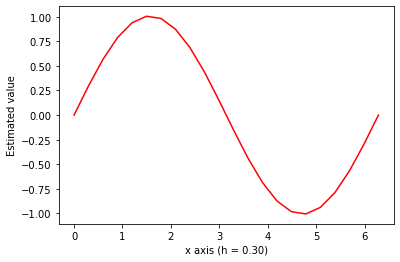

In [19]:
# Visualization
plt.plot(X,Y, 'r')
plt.xlabel(f'x axis (h = {h:.2f})')
plt.ylabel('Estimated value')
plt.show()